<a href="https://colab.research.google.com/github/GildasTaliah/FinancialTrading/blob/main/ML_BasedStrategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Machine Learning Stock Return Prediction Leveraging Technical Indicators**

## **Intro**

$\quad$

Machine Learning (ML) is the science and art of programming computers so they can learn from data.
$\quad$

Traditional **econometrics models** such as linear regression and time series models are useful for forecasting returns and generating alpha signals based factor models (e.g CAPM, APT). However, they fall short when dealing with non-linear relationship between variables. Machine Learning techniques, while less interpretable, have shown to be more effective in these scenarios, especially with larger data sets.
$\quad$

CAPM: Capital Asset Pricing Model.
APT: Arbitrage Pricing Theory.
$\quad$

Machine learning techniques can be classified into three main classes namely supervised learning, unsupervised learning and Reinforcement learning. Furthermore,  Supervised learning can be classified into regression and classification techniques. There are numerous machine learning (ML) techniques that can be used for a variety of tasks, including regression, classification, and clustering.

Some examples of ML techniques available at our disposal include Ridge Regression, Logistic Regression, Support Vector Regression/Classification, Decision Trees Regression/Classification, Gradient Boosting, K-means Clustering etc.Our focus here is on the implementation of two types namely **Decision Trees and Random Forests**.


A typical machine learning process usually starts with **Data Collection** where the required data is gotten from source be it external or internal. It proceeds to **Data Cleaning** where the data is checked for accuracy, visualized and exploratory data analysis is carried out. Next, comes **Model Implementation** and **Model Validation**.



$\quad$
$\quad$
$\quad$
$\quad$

# **Machine Learning Classification Model**

Supervised ML techniques aims to predicts an output given sets of input features. In classification problems the output we are working with is either binary or from a fixed set of classifiers. We consider the decision trees and the random forest classifiers in this section.

**Decision trees** work by breaking a data set down based on it's features, creating a tree like structure to model this data. The algorithm first splits the training set into two subsets using a single feature $K$ and a threshold $t_{k}$. It searches the pair paramters ($K$, $t_{k}$) that produces the purest subsets.

**Random forest** combines the predictions made by multiple decision trees and returns a single outcome. Through a technique known as bagging or boostrap aggregation, the model leverages the capabilities of multiple decision trees. For classification the outcome is the majority class prediction.

## Downloading Data

We utilize a credible external source: Yahoo, to download data to be used for our experimentation.

In [215]:
import yfinance as yf

In [216]:
tickers = ['AAPL', 'TSLA', 'NFLX', 'MSFT', 'NVDA', 'AMZN', 'GM', 'BX']

In [217]:
# Select Nvidia for case study
DF = yf.download(tickers[4])

[*********************100%%**********************]  1 of 1 completed


In [218]:
df_cla = DF.copy()
df_cla

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-22,0.043750,0.048828,0.038802,0.041016,0.037621,2714688000
1999-01-25,0.044271,0.045833,0.041016,0.045313,0.041562,510480000
1999-01-26,0.045833,0.046745,0.041146,0.041797,0.038337,343200000
1999-01-27,0.041927,0.042969,0.039583,0.041667,0.038218,244368000
1999-01-28,0.041667,0.041927,0.041276,0.041536,0.038098,227520000
...,...,...,...,...,...,...
2024-06-12,123.059998,126.879997,122.570000,125.199997,125.199997,299595000
2024-06-13,129.389999,129.800003,127.160004,129.610001,129.610001,260704500
2024-06-14,129.960007,132.839996,128.320007,131.880005,131.880005,309320400


In [219]:
df_cla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6393 entries, 1999-01-22 to 2024-06-18
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       6393 non-null   float64
 1   High       6393 non-null   float64
 2   Low        6393 non-null   float64
 3   Close      6393 non-null   float64
 4   Adj Close  6393 non-null   float64
 5   Volume     6393 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 349.6 KB


## Data Visualization

Let us look at the price evolution, from inception to present day: 18-06-2024.

In [220]:
import plotly.graph_objects as go

In [221]:
df = df_cla
fig = go.Figure(data = [go.Candlestick(x = df.index,
                open = df['Open'],
                high = df['High'],
                low = df['Low'],
                close = df['Close'])])
fig.show()

## Data Processiong and Feature Extraction

At this stage we extract additional features that would be used together with the price data: OHLC, to predict next day returns direction.

In [222]:
# computes returns and shift behind by a day
#df_aapl_new['change_tomorrow'] = df_aapl_new.Close.pct_change(-1)  * (-1)  * 100
#df_cla['Volume'] = np.log(df_cla.Volume)

# Percentage returns
df_cla['change_tomorrow'] = df_cla.Close.pct_change()  * 100

# Momentum indicators
df_cla['SMA30'] = df_cla.change_tomorrow.rolling(30).mean()
df_cla['SMA180'] = df_cla.change_tomorrow.rolling(180).mean()

# Volatility Indicator
df_cla['Vol'] = df_cla.change_tomorrow.rolling(30).std()

# Mean Reverting Indicator: distance
df_cla['dist'] = df_cla['Close'] - df_cla['Close'].rolling(30).mean()

# Shift returns one day behind to serve as targets/dependent variable
df_cla['change_tomorrow'] = df_cla.change_tomorrow.shift(-1)
df_cla.dropna(inplace = True)
df_cla

,Open,High,Low,Close,Adj Close,Volume,change_tomorrow,SMA30,SMA180,Vol,dist
Date,,,,,,,,,,,
1999-10-08,0.046615,0.050391,0.044792,0.048958,0.044906,398928000,-2.659423,-0.004209,0.195301,5.618306,0.000119
1999-10-11,0.049349,0.049479,0.046354,0.047656,0.043711,544464000,-1.366036,-0.279009,0.122324,5.536543,-0.000966
1999-10-12,0.047917,0.048438,0.046875,0.047005,0.043114,322992000,-2.769918,-0.312482,0.157842,5.540095,-0.001385
1999-10-13,0.046484,0.046484,0.044792,0.045703,0.041920,280368000,-1.993307,-0.690336,0.144182,5.294827,-0.002257
1999-10-14,0.045833,0.045833,0.044271,0.044792,0.041084,192336000,-0.582696,-0.601189,0.134855,5.247858,-0.002799
...,...,...,...,...,...,...,...,...,...,...,...
2024-06-11,121.769997,122.870003,118.739998,120.910004,120.910004,222551200,3.548088,1.116754,0.634521,3.011005,19.519703
2024-06-12,123.059998,126.879997,122.570000,125.199997,125.199997,299595000,3.522367,1.286491,0.646061,2.999342,22.516430
2024-06-13,129.389999,129.800003,127.160004,129.610001,129.610001,260704500,1.751411,1.533569,0.669722,2.860297,25.374134


In [290]:
df_cla.describe().round(4)

,Open,High,Low,Close,Adj Close,Volume,SMA30,SMA180,Vol,dist
count,6212.0000,6212.0000,6212.0000,6212.0000,6212.0000,6.212000e+03,6212.0000,6212.0000,6212.0000,6212.0000
mean,5.8350,5.9410,5.7238,5.8397,5.8125,6.189133e+08,0.1946,0.1900,3.3182,0.2695
std,14.2339,14.4866,13.9570,14.2492,14.2517,4.308411e+08,0.6975,0.3120,1.7977,1.8168
min,0.0411,0.0424,0.0397,0.0405,0.0371,4.564400e+07,-2.8383,-1.0147,0.7592,-12.2448
25%,0.2903,0.2986,0.2833,0.2911,0.2670,3.588340e+08,-0.1689,0.0265,2.0727,-0.0176
50%,0.4671,0.4739,0.4596,0.4670,0.4378,5.171080e+08,0.1966,0.2006,2.8595,0.0098
75%,4.2558,4.3104,4.1867,4.2519,4.2139,7.441500e+08,0.5550,0.3712,4.0375,0.0613
max,132.9900,133.7300,129.5800,131.8800,131.8800,9.230856e+09,5.2199,1.4465,13.5376,26.1087


Did stock go up or down

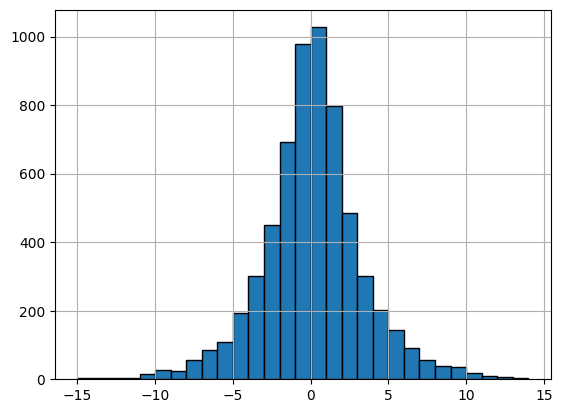

In [223]:
df_cla.change_tomorrow.hist(bins=range(-15,15), edgecolor='black');

In [224]:
print(f'Mean : {df_cla.change_tomorrow.mean():.4f}\n')
print(f'StandDev: {df_cla.change_tomorrow.std():.4f}\n')

Mean : 0.1981

StandDev: 3.7658



In [225]:
import numpy as np
df_cla['change_tomorrow'] = np.where( df_cla['change_tomorrow'] > 0, 'UP', 'DOWN')
df_cla
df_cla.head()

,Open,High,Low,Close,Adj Close,Volume,change_tomorrow,SMA30,SMA180,Vol,dist
Date,,,,,,,,,,,
1999-10-08,0.046615,0.050391,0.044792,0.048958,0.044906,398928000,DOWN,-0.004209,0.195301,5.618306,0.000119
1999-10-11,0.049349,0.049479,0.046354,0.047656,0.043711,544464000,DOWN,-0.279009,0.122324,5.536543,-0.000966
1999-10-12,0.047917,0.048438,0.046875,0.047005,0.043114,322992000,DOWN,-0.312482,0.157842,5.540095,-0.001385
1999-10-13,0.046484,0.046484,0.044792,0.045703,0.041920,280368000,DOWN,-0.690336,0.144182,5.294827,-0.002257
1999-10-14,0.045833,0.045833,0.044271,0.044792,0.041084,192336000,DOWN,-0.601189,0.134855,5.247858,-0.002799


In [226]:
print(f' Value Counts : {df_cla.change_tomorrow.value_counts()}')

# Split data, use last 500 for testing
df_cla_is = df_cla.iloc[:-500]
df_cla_oos = df_cla.iloc[-500:]

 Value Counts : change_tomorrow
UP      3210
DOWN    3002
Name: count, dtype: int64


In [227]:
# Obtain target and features
target = df_cla_is.change_tomorrow
explanatory = df_cla_is.drop(columns='change_tomorrow')

target_is = df_cla_oos.change_tomorrow
explanatory_oos = df_cla_oos.drop(columns='change_tomorrow')

The parametrs needed for for the model include but not limited to: criterion, max_depth, splitter, n_estimators etc. We work with the default parameters except for the maximum depth of trees where we set it to **15**.  

In [228]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate and fit tree model, with max depth 15
model_dt = DecisionTreeClassifier(max_depth= 15)
model_dt.fit(explanatory, target)

DecisionTreeClassifier(max_depth=15)

In [229]:
from sklearn.ensemble import RandomForestClassifier

# Inatsntiate an fit forest model, with max depth 15
model_rf = RandomForestClassifier(max_depth=15, random_state=42)
model_rf.fit(explanatory, target)

RandomForestClassifier(max_depth=15, random_state=42)

In [230]:
from sklearn.tree import plot_tree

#plot_tree(decision_tree= model_dt, feature_names= model_dt.feature_names_in_)

In-Sample

In [231]:
y_pred_dt = model_dt.predict(X = explanatory)
y_pred_dt

array(['DOWN', 'UP', 'DOWN', ..., 'UP', 'UP', 'UP'], dtype=object)

In [232]:
y_pred_rf = model_rf.predict(X = explanatory)
y_pred_rf

array(['DOWN', 'DOWN', 'DOWN', ..., 'UP', 'UP', 'DOWN'], dtype=object)

In [233]:
# Concat predicted values and actual values in a frame
import pandas as pd
df_pred_dt = pd.DataFrame(target)
df_pred_dt['prediction'] = y_pred_dt
df_pred_dt.head()

,change_tomorrow,prediction
Date,,
1999-10-08,DOWN,DOWN
1999-10-11,DOWN,UP
1999-10-12,DOWN,DOWN
1999-10-13,DOWN,DOWN
1999-10-14,DOWN,DOWN


In [234]:
# Pred and actual value in a frame
df_pred_rf = pd.DataFrame(target)
df_pred_rf['prediction'] = y_pred_rf
df_pred_rf.head()

,change_tomorrow,prediction
Date,,
1999-10-08,DOWN,DOWN
1999-10-11,DOWN,DOWN
1999-10-12,DOWN,DOWN
1999-10-13,DOWN,DOWN
1999-10-14,DOWN,DOWN


In [235]:
y_pred_dt_t = model_dt.predict(X = explanatory)
y_pred_dt_t[:10]

array(['DOWN', 'UP', 'DOWN', 'DOWN', 'DOWN', 'DOWN', 'DOWN', 'UP', 'UP',
       'UP'], dtype=object)

In [236]:
y_pred_rf_t = model_rf.predict(X = explanatory)
y_pred_rf_t[:10]

array(['DOWN', 'DOWN', 'DOWN', 'DOWN', 'DOWN', 'DOWN', 'DOWN', 'UP', 'UP',
       'UP'], dtype=object)

In [237]:
df_pred_dt_t = pd.DataFrame( target)
df_pred_dt_t['prediction'] = y_pred_dt_t
df_pred_dt_t.head()

,change_tomorrow,prediction
Date,,
1999-10-08,DOWN,DOWN
1999-10-11,DOWN,UP
1999-10-12,DOWN,DOWN
1999-10-13,DOWN,DOWN
1999-10-14,DOWN,DOWN


Evaluate the model:

Use accuracy metric to evaluate

In [238]:
compdt = df_pred_dt.change_tomorrow == df_pred_dt.prediction
compdt.sum()

3903

In [239]:
comprf = df_pred_rf.change_tomorrow == df_pred_rf.prediction
comprf.sum()

5536

In [240]:
len(comprf)

5712

In [242]:
compdt.sum() / len(compdt)

0.6832983193277311

In [243]:
comprf.sum() / len(comprf)

0.969187675070028

In [33]:
#pip install  backtesting

We use all stock price data: OHLCV, in addition to the technical features as features to predict next day direction.

## **Strategy logic**
If our model predicts 'UP' and we haven't bought the underlying stock yet, we initiate a 'buy order', then and proceed to set 'already_bought' to: *True!*, the reverse holds for sell orders.

In [119]:
from backtesting import Backtest, Strategy

In [248]:
class ClassificationUD(Strategy):
  def init(self):
    self.model = model_rf
    self.already_bought = False

  def next(self):
    explanatory_today = self.data.df.iloc[[-1], :]
    forecast_tomorrow = self.model.predict(explanatory_today)[0]

    # condition to buy or sell

    if forecast_tomorrow == 'UP' and self.already_bought == False:
      self.buy()
      self.already_bought = True

    elif forecast_tomorrow == 'DOWN' and self.already_bought == True:
      self.buy()
      self.already_bought = False
    else:
      pass

In [249]:
bt = Backtest(explanatory_oos, ClassificationUD,
            cash= 10_000, commission= 0.002, exclusive_orders= True )

In [250]:
results = bt.run()

In [247]:
# Decision Tree
results.to_frame(name = 'Values').loc[:'Max. Drawdown [%]']

,Values
Start,2022-06-22 00:00:00
End,2024-06-17 00:00:00
Duration,726 days 00:00:00
Exposure Time [%],99.6
Equity Final [$],72888.3403
Equity Peak [$],72888.3403
Return [%],628.883403
Buy & Hold Return [%],700.611191
Return (Ann.) [%],172.132031
Volatility (Ann.) [%],150.933477


In [251]:
# Random Forest
results.to_frame(name = 'Values').loc[:'Max. Drawdown [%]']

,Values
Start,2022-06-22 00:00:00
End,2024-06-17 00:00:00
Duration,726 days 00:00:00
Exposure Time [%],98.8
Equity Final [$],81799.409635
Equity Peak [$],81799.409635
Return [%],717.994096
Buy & Hold Return [%],700.611191
Return (Ann.) [%],188.420473
Volatility (Ann.) [%],158.91414


$\quad$
$\quad$
$\quad$

**Now we automate the process** so we can apply to different sets of stocks

In [124]:
from sklearn.metrics import accuracy_score

In [252]:
def ML_ClassStratBacktest(ticker: str, test_set: int = 500, model: str= 'RF') -> pd.DataFrame:


  # Download history
  DF = yf.download(ticker)
  df = DF.copy()

  #df['change_tomorrow'] = df.change_tomorrow.shift(-1)


  ## Preprocesing and feature extraction
  # Percentage returns
  df['change_tomorrow'] = df.Close.pct_change()  * 100
  # Momentum indicators
  df['SMA30'] = df.change_tomorrow.rolling(30).mean()
  df['SMA180'] = df.change_tomorrow.rolling(180).mean()
  # Volatility Indicator
  df['Vol'] = df.change_tomorrow.rolling(30).std()
  # Mean Reverting Indicator: distance
  df['dist'] = df['Close'] - df['Close'].rolling(30).mean()

  # Shift returns one day behind to serve as targets/dependent variable
  df['change_tomorrow'] = df.change_tomorrow.shift(-1)
  df.dropna(inplace= True)

  # classify return to 'UP' or 'DOWN'
  df['change_tomorrow'] = np.where( df['change_tomorrow'] > 0, 'UP', 'DOWN')


  # Split data: In-sample ans Out-of-Sample
  df_is = df.iloc[:-test_set]
  df_oos = df.iloc[-test_set:]

  # Obtain target and features
  target = df_is.change_tomorrow
  explanatory = df_is.drop(columns='change_tomorrow')

  target_oos = df_oos.change_tomorrow
  explanatory_oos = df_oos.drop(columns='change_tomorrow')

  ## Inantiate and fit model, with max depth 15
  if model == 'DT':
    model = DecisionTreeClassifier(max_depth=15)
    model.fit(explanatory, target)
  elif model == 'RF':
    model = RandomForestClassifier(max_depth=15, random_state=42)
    model.fit(explanatory, target)
  else:
    pass


  ## Print In-sample and Out-sample accuracy score
  # Predictions on train and test set
  pred = model.predict(explanatory)
  pred_oos = model.predict(explanatory_oos)

  # Predictions on train set
  print(f'Pred accuracy for: {ticker}')
  # Train score
  print(f'Train accuracy score: {accuracy_score(pred, target)}')
  # Test score
  print(f'Test accuracy score: {accuracy_score(pred_oos, target_oos)}')
  print()


  ## 'Classification Strategy' class, to be used in 'Bactest' function
  class ClassificationUD(Strategy):
    def init(self):
      self.model = model
      self.already_bought = False

    def next(self):
      explanatory_today = self.data.df.iloc[[-1], :]
      forecast_tomorrow = self.model.predict(explanatory_today)[0]

    # condition to buy or sell
      if forecast_tomorrow == 'UP' and self.already_bought == False:
        self.buy()
        self.already_bought = True

      elif forecast_tomorrow == 'DOWN' and self.already_bought == True:
        self.buy()
        self.already_bought = False

      else:
        pass


  ## Intance backtesting class with initial amount: 10_000, comm fee: .2%
  bt = Backtest(explanatory_oos, ClassificationUD,
            cash= 10_000, commission= 0.002, exclusive_orders= True )

  results = bt.run()

  return results.to_frame(name= ticker).loc[:'Max. Drawdown [%]']

In [253]:
ML_ClassStratBacktest('NVDA')

[*********************100%%**********************]  1 of 1 completed


Pred accuracy for: NVDA
Train accuracy score: 0.969187675070028
Test accuracy score: 0.472



,NVDA
Start,2022-06-22 00:00:00
End,2024-06-17 00:00:00
Duration,726 days 00:00:00
Exposure Time [%],98.8
Equity Final [$],81799.409635
Equity Peak [$],81799.409635
Return [%],717.994096
Buy & Hold Return [%],700.611191
Return (Ann.) [%],188.420473
Volatility (Ann.) [%],158.91414


 $\quad$
 $\quad$
 $\quad$
 $\quad$

$\quad$
$\quad$
$\quad$

# **Machine Learning Regression Model**
$\quad$

Decision trees and Random forest introduced earlier are also capable of performing regression task, as you may have gues their output would be continuous variables.

In this part we essentially re-do the whole task as above, except we make use their regression algorithm.

In [255]:
# Stock price data already downloaded from above
DF = yf.download('NVDA')

[*********************100%%**********************]  1 of 1 completed


In [256]:
df = DF.copy()
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-22,0.043750,0.048828,0.038802,0.041016,0.037621,2714688000
1999-01-25,0.044271,0.045833,0.041016,0.045313,0.041562,510480000
1999-01-26,0.045833,0.046745,0.041146,0.041797,0.038337,343200000
1999-01-27,0.041927,0.042969,0.039583,0.041667,0.038218,244368000
1999-01-28,0.041667,0.041927,0.041276,0.041536,0.038098,227520000
...,...,...,...,...,...,...
2024-06-12,123.059998,126.879997,122.570000,125.199997,125.199997,299595000
2024-06-13,129.389999,129.800003,127.160004,129.610001,129.610001,260704500
2024-06-14,129.960007,132.839996,128.320007,131.880005,131.880005,309320400


##  Data Processing

In [257]:
#df['Volume'] = np.log(df.Volume)
# Percentage returns
df['change_tomorrow'] = df.Close.pct_change()  * 100

# Momentum indicators
df['SMA30'] = df.change_tomorrow.rolling(30).mean()
df['SMA180'] = df.change_tomorrow.rolling(180).mean()

# Volatility Indicator
df['Vol'] = df.change_tomorrow.rolling(30).std()

# Mean Reverting Indicator: distance
df['dist'] = df['Close'] - df['Close'].rolling(30).mean()

# Shift returns one day behind to serve as targets/dependent variable
df['change_tomorrow'] = df.change_tomorrow.shift(-1)
df.dropna(inplace = True)
df

,Open,High,Low,Close,Adj Close,Volume,change_tomorrow,SMA30,SMA180,Vol,dist
Date,,,,,,,,,,,
1999-10-08,0.046615,0.050391,0.044792,0.048958,0.044906,398928000,-2.659423,-0.004209,0.195301,5.618306,0.000119
1999-10-11,0.049349,0.049479,0.046354,0.047656,0.043711,544464000,-1.366036,-0.279009,0.122324,5.536543,-0.000966
1999-10-12,0.047917,0.048438,0.046875,0.047005,0.043114,322992000,-2.769918,-0.312482,0.157842,5.540095,-0.001385
1999-10-13,0.046484,0.046484,0.044792,0.045703,0.041920,280368000,-1.993307,-0.690336,0.144182,5.294827,-0.002257
1999-10-14,0.045833,0.045833,0.044271,0.044792,0.041084,192336000,-0.582696,-0.601189,0.134855,5.247858,-0.002799
...,...,...,...,...,...,...,...,...,...,...,...
2024-06-11,121.769997,122.870003,118.739998,120.910004,120.910004,222551200,3.548088,1.116754,0.634521,3.011005,19.519703
2024-06-12,123.059998,126.879997,122.570000,125.199997,125.199997,299595000,3.522367,1.286491,0.646061,2.999342,22.516430
2024-06-13,129.389999,129.800003,127.160004,129.610001,129.610001,260704500,1.751411,1.533569,0.669722,2.860297,25.374134


In [258]:
# In-sample and out-sample data
df_is = df.iloc[:-500]
df_oos = df.iloc[-500:]
df_oos

,Open,High,Low,Close,Adj Close,Volume,change_tomorrow,SMA30,SMA180,Vol,dist
Date,,,,,,,,,,,
2022-06-22,16.226000,16.662001,16.180000,16.360001,16.341595,437135000,-0.825185,-0.020102,-0.022067,4.507446,-0.976499
2022-06-23,16.518999,16.584999,15.853000,16.225000,16.206747,463680000,5.553153,-0.174451,-0.046895,4.450861,-1.065833
2022-06-24,16.500000,17.139999,16.309999,17.125999,17.106731,472153000,-1.500642,0.193471,-0.022808,4.452982,-0.181367
2022-06-27,17.312000,17.330000,16.625999,16.868999,16.850023,427968000,-5.258161,0.234650,-0.041209,4.430613,-0.461501
2022-06-28,16.900000,17.202000,15.945000,15.982000,15.964023,461149000,-2.753101,-0.256129,-0.063989,4.181326,-1.291033
...,...,...,...,...,...,...,...,...,...,...,...
2024-06-11,121.769997,122.870003,118.739998,120.910004,120.910004,222551200,3.548088,1.116754,0.634521,3.011005,19.519703
2024-06-12,123.059998,126.879997,122.570000,125.199997,125.199997,299595000,3.522367,1.286491,0.646061,2.999342,22.516430
2024-06-13,129.389999,129.800003,127.160004,129.610001,129.610001,260704500,1.751411,1.533569,0.669722,2.860297,25.374134


In [259]:
# Split data to train and test
target = df_is.change_tomorrow
explanatory = df_is.drop(columns='change_tomorrow') #df_is[['Open','High','Low','Close','Volume']]

target_is = df_oos.change_tomorrow
explanatory_oos = df_oos.drop(columns='change_tomorrow') # df_oos[['Open','High','Low','Close','Volume']]

In [ ]:
explanatory_oos.head()

,Open,High,Low,Close,Adj Close,Volume,SMA50,SMA250
Date,,,,,,,,
2022-06-21,16.475000,17.007999,16.407000,16.566000,16.547365,483089000,-0.652632,0.009749
2022-06-22,16.226000,16.662001,16.180000,16.360001,16.341597,437135000,-0.587532,0.001663
2022-06-23,16.518999,16.584999,15.853000,16.225000,16.206749,463680000,-0.500052,0.001997
2022-06-24,16.500000,17.139999,16.309999,17.125999,17.106733,472153000,-0.351302,0.004158
2022-06-27,17.312000,17.330000,16.625999,16.868999,16.850023,427968000,-0.446325,-0.002680


In [260]:
from sklearn.tree import DecisionTreeRegressor

# Inantiate and fit decision tree, with max depth 15
model_dt = DecisionTreeRegressor(max_depth=15)
model_dt.fit(explanatory, target)

DecisionTreeRegressor(max_depth=15)

In [261]:
from sklearn.ensemble import RandomForestRegressor

# Inantiate and fit random forest, with max depth 15
model_rf = RandomForestRegressor(max_depth=15, random_state=75)
model_rf.fit(explanatory, target)

RandomForestRegressor(max_depth=15, random_state=75)

In [263]:
y_pred = model_dt.predict(X=explanatory)
df_predictions = df_is[['change_tomorrow']].copy()

df_predictions['prediction'] = y_pred
df_predictions.head()

,change_tomorrow,prediction
Date,,
1999-10-08,-2.659423,-2.659423
1999-10-11,-1.366036,-1.366036
1999-10-12,-2.769918,-2.769918
1999-10-13,-1.993307,-1.928217
1999-10-14,-0.582696,-0.582696


In [265]:
y_predrf = model_rf.predict(X=explanatory)
df_predictionsrf = df_is[['change_tomorrow']].copy()

df_predictionsrf['prediction'] = y_predrf
df_predictionsrf.head()

,change_tomorrow,prediction
Date,,
1999-10-08,-2.659423,-0.803421
1999-10-11,-1.366036,0.124402
1999-10-12,-2.769918,-1.404302
1999-10-13,-1.993307,-1.499226
1999-10-14,-0.582696,-1.085540


Evaluate model predictions

In [266]:
# Decision Tree
error_sqrt = (df_predictions.change_tomorrow - df_predictions.prediction) ** 2
print(f' Mean Squared Error: {error_sqrt.mean():.4f}\n')

 Mean Squared Error: 10.8623



In [267]:
# Random Forest
error_sqrt = (df_predictionsrf.change_tomorrow - df_predictionsrf.prediction) ** 2
print(f' Mean Squared Error: {error_sqrt.mean():.4f}\n')

 Mean Squared Error: 9.1444



In [ ]:
#pip install backtesting

## **Strategy logic**
If our regression model predicts the next day's return would be greater than 1%  and we haven't bought the underlying stock yet, we initiate a buy order, else if it predicts next day's return less than -4% we initiate a sell order.

Typically, a set of target parameter needs to be tested on in-sample data to see which pair would likely yield optimal results out-sample, this procedure is known as **strategy optmization**. The target 1% and -4% were choosen arbitrarily.



In [273]:
class Regression(Strategy):
    def init(self):
        self.model = model_rf
        self.already_bought = False

    def next(self):
        explanatory_today = self.data.df.iloc[[-1], :]
        forecast_tomorrow = self.model.predict(explanatory_today)[0]

        if forecast_tomorrow > 1 and self.already_bought == False:
            self.buy()
            self.already_bought = True
        elif forecast_tomorrow < -4 and self.already_bought == True:
            self.sell()
            self.already_bought = False
        else:
            pass

In [274]:
bt = Backtest(explanatory_oos, Regression,
              cash=10000, commission=.002, exclusive_orders=True)

In [275]:
# Run bactest
results = bt.run()

In [271]:
# Decision Tree
results.to_frame(name='Values').loc[:'Max. Drawdown [%]']


,Values
Start,2022-06-22 00:00:00
End,2024-06-17 00:00:00
Duration,726 days 00:00:00
Exposure Time [%],0.0
Equity Final [$],10000.0
Equity Peak [$],10000.0
Return [%],0.0
Buy & Hold Return [%],700.611191
Return (Ann.) [%],0.0
Volatility (Ann.) [%],0.0


In [276]:
# Random Forest
results.to_frame(name='Values').loc[:'Max. Drawdown [%]']

,Values
Start,2022-06-22 00:00:00
End,2024-06-17 00:00:00
Duration,726 days 00:00:00
Exposure Time [%],86.4
Equity Final [$],106926.369259
Equity Peak [$],106926.369259
Return [%],969.263693
Buy & Hold Return [%],700.611191
Return (Ann.) [%],230.110052
Volatility (Ann.) [%],166.400866


In [277]:
# Import metric to asses regression models perfomance
from sklearn.metrics import mean_squared_error as mse

In [285]:
def ML_RegStratBacktest(ticker: str, test_set: int = 500, model: str= 'RF') -> pd.DataFrame:


  # Download history
  DF = yf.download(ticker)
  df = DF.copy()

  ## Preprocesing and feature extraction
  # Percentage returns
  df['change_tomorrow'] = df.Close.pct_change()  * 100
  # Momentum indicators
  df['SMA30'] = df.change_tomorrow.rolling(30).mean()
  df['SMA180'] = df.change_tomorrow.rolling(180).mean()
  # Volatility Indicator
  df['Vol'] = df.change_tomorrow.rolling(30).std()
  # Mean Reverting Indicator: distance
  df['dist'] = df['Close'] - df['Close'].rolling(30).mean()

  # Shift returns one day behind to serve as targets/dependent variable
  df['change_tomorrow'] = df.change_tomorrow.shift(-1)
  df.dropna(inplace = True)

  # Split data: In-sample ans Out-of-Sample
  df_is = df.iloc[:-test_set]
  df_oos = df.iloc[-test_set:]

  # Obtain target and features
  target = df_is.change_tomorrow
  explanatory = df_is.drop(columns='change_tomorrow')

  target_oos = df_oos.change_tomorrow
  explanatory_oos = df_oos.drop(columns='change_tomorrow')


  # Instantiate and fit model, with max depth 15
  if model == 'DT':
    model = DecisionTreeRegressor(max_depth=15)
    model.fit(explanatory, target)
  elif model == 'RF':
    model = RandomForestRegressor(max_depth=15, random_state=75)
    model.fit(explanatory, target)
  else:
    pass

  ## Print In-sample and Out-sample accuracy score
  # Predictions on train and test set
  pred = model.predict(explanatory)
  pred_oos = model.predict(explanatory_oos)

  # Predictions on train set
  print(f'Pred error for: {ticker}')
  # Train score
  print(f'Train error: {mse(pred, target)}')
  # Test score
  print(f'Test error: {mse(pred_oos, target_oos)}')
  print()


  ## 'Regression Strategy' class, to be used in Bactest function
  class Regression(Strategy):
    def init(self):
        self.model = model
        self.already_bought = False

    def next(self):
        explanatory_today = self.data.df.iloc[[-1], :]
        forecast_tomorrow = self.model.predict(explanatory_today)[0]

        if forecast_tomorrow > 1 and self.already_bought == False:
            self.buy()
            self.already_bought = True
        elif forecast_tomorrow < -4 and self.already_bought == True:
            self.sell()
            self.already_bought = False
        else:
            pass


  # Intance backtesting class with initial amount: 10_000, comm fee: .2%
  bt = Backtest(explanatory_oos, Regression,
              cash=10000, commission= 0.002, exclusive_orders=True)

  results = bt.run()

  #return results.to_frame(name='Values').loc[:'Return [%]'] #Max. Drawdown [%]
  return results.to_frame(name= ticker).loc[:'Max. Drawdown [%]']

In [279]:
ML_RegStratBacktest('NVDA')

[*********************100%%**********************]  1 of 1 completed


Pred error for: NVDA
Train error: 9.14449496006159
Test error: 11.121648069069437


,NVDA
Start,2022-06-22 00:00:00
End,2024-06-17 00:00:00
Duration,726 days 00:00:00
Exposure Time [%],86.4
Equity Final [$],106926.369259
Equity Peak [$],106926.369259
Return [%],969.263693
Buy & Hold Return [%],700.611191
Return (Ann.) [%],230.110052
Volatility (Ann.) [%],166.400866


# Results

In [280]:
# Run bactest for each and print accuracy score
result_CLAS = [ML_ClassStratBacktest(ticker) for ticker in tickers]

[*********************100%%**********************]  1 of 1 completed


Pred accuracy for: AAPL
Train accuracy score: 0.9491690154533968
Test accuracy score: 0.478



[*********************100%%**********************]  1 of 1 completed


Pred accuracy for: TSLA
Train accuracy score: 0.9904795486600846
Test accuracy score: 0.484



[*********************100%%**********************]  1 of 1 completed


Pred accuracy for: NFLX
Train accuracy score: 0.9735384615384616
Test accuracy score: 0.504



[*********************100%%**********************]  1 of 1 completed


Pred accuracy for: MSFT
Train accuracy score: 0.9480084793038045
Test accuracy score: 0.51



[*********************100%%**********************]  1 of 1 completed


Pred accuracy for: NVDA
Train accuracy score: 0.9690126050420168
Test accuracy score: 0.47



[*********************100%%**********************]  1 of 1 completed


Pred accuracy for: AMZN
Train accuracy score: 0.9731138992993319
Test accuracy score: 0.482



[*********************100%%**********************]  1 of 1 completed


Pred accuracy for: GM
Train accuracy score: 0.9970760233918129
Test accuracy score: 0.49



[*********************100%%**********************]  1 of 1 completed


Pred accuracy for: BX
Train accuracy score: 0.9852614015572859
Test accuracy score: 0.544



In [286]:
# Run bactest for each and print mean squared error
result_REG = [ML_RegStratBacktest(ticker) for ticker in tickers]

[*********************100%%**********************]  1 of 1 completed


Pred error for: AAPL
Train error: 5.776268695414257
Test error: 2.6975195472111353



[*********************100%%**********************]  1 of 1 completed


Pred error for: TSLA
Train error: 7.092952234399511
Test error: 13.858292016100451



[*********************100%%**********************]  1 of 1 completed


Pred error for: NFLX
Train error: 6.620056467528775
Test error: 7.4880108626938355



[*********************100%%**********************]  1 of 1 completed


Pred error for: MSFT
Train error: 3.236965007794076
Test error: 2.981316775541257



[*********************100%%**********************]  1 of 1 completed


Pred error for: NVDA
Train error: 9.144464316833478
Test error: 11.121648069069437



[*********************100%%**********************]  1 of 1 completed


Pred error for: AMZN
Train error: 7.579767135336154
Test error: 5.060884366543363



[*********************100%%**********************]  1 of 1 completed


Pred error for: GM
Train error: 2.519083518473781
Test error: 4.974643566554989



[*********************100%%**********************]  1 of 1 completed


Pred error for: BX
Train error: 4.647960167576505
Test error: 5.946336869831674



In [283]:
# @title Out-sample Results from ML Classification Model
pd.concat(result_CLAS, axis = 1)

,AAPL,TSLA,NFLX,MSFT,NVDA,AMZN,GM,BX
Start,2022-06-22 00:00:00,2022-06-22 00:00:00,2022-06-22 00:00:00,2022-06-22 00:00:00,2022-06-22 00:00:00,2022-06-22 00:00:00,2022-06-22 00:00:00,2022-06-22 00:00:00
End,2024-06-17 00:00:00,2024-06-17 00:00:00,2024-06-17 00:00:00,2024-06-17 00:00:00,2024-06-17 00:00:00,2024-06-17 00:00:00,2024-06-17 00:00:00,2024-06-17 00:00:00
Duration,726 days 00:00:00,726 days 00:00:00,726 days 00:00:00,726 days 00:00:00,726 days 00:00:00,726 days 00:00:00,726 days 00:00:00,726 days 00:00:00
Exposure Time [%],99.4,99.4,96.8,99.6,98.8,99.0,99.6,99.6
Equity Final [$],12671.714213,6330.859295,29703.00961,13926.528713,81417.180624,13849.694452,11204.067085,11374.170946
Equity Peak [$],12723.044825,12160.717644,29714.89047,13926.528713,81417.180624,14588.737155,12246.875773,13197.756555
Return [%],26.717142,-36.691407,197.030096,39.265287,714.171806,38.496945,12.040671,13.741709
Buy & Hold Return [%],60.081262,-20.605427,277.790832,77.130323,700.611191,68.939883,44.380137,33.859304
Return (Ann.) [%],12.675379,-20.578665,73.097753,18.167164,187.740434,17.838134,5.897414,6.704701
Volatility (Ann.) [%],29.50089,47.254246,73.857745,32.065793,158.465609,42.677259,37.247953,42.664297


In [284]:
# @title Out-sample Results from ML Regression Model
pd.concat(result_REG, axis = 1)

,AAPL,TSLA,NFLX,MSFT,NVDA,AMZN,GM,BX
Start,2022-06-22 00:00:00,2022-06-22 00:00:00,2022-06-22 00:00:00,2022-06-22 00:00:00,2022-06-22 00:00:00,2022-06-22 00:00:00,2022-06-22 00:00:00,2022-06-22 00:00:00
End,2024-06-17 00:00:00,2024-06-17 00:00:00,2024-06-17 00:00:00,2024-06-17 00:00:00,2024-06-17 00:00:00,2024-06-17 00:00:00,2024-06-17 00:00:00,2024-06-17 00:00:00
Duration,726 days 00:00:00,726 days 00:00:00,726 days 00:00:00,726 days 00:00:00,726 days 00:00:00,726 days 00:00:00,726 days 00:00:00,726 days 00:00:00
Exposure Time [%],73.6,96.8,98.6,89.6,86.4,76.6,98.4,86.6
Equity Final [$],16554.549329,7435.039925,37566.951991,17063.348196,106926.369259,20528.372729,14994.489014,14193.28259
Equity Peak [$],16621.540128,12822.4403,37582.073085,17063.348196,106926.369259,21310.132251,15660.0896,15612.493162
Return [%],65.545493,-25.649601,275.66952,70.633482,969.263693,105.283727,49.94489,41.932826
Buy & Hold Return [%],60.081262,-20.605427,277.790832,77.130323,700.611191,68.939883,44.380137,33.859304
Return (Ann.) [%],28.924172,-13.875486,94.850805,30.90625,230.110052,43.690045,22.650567,19.302558
Volatility (Ann.) [%],24.040605,50.099117,84.271529,32.937373,166.400866,39.053785,42.699077,43.444561


$\quad$

We can observe that on average most stocks perform well under ML regression strategy when compared to ML classification. Tesla suffers a loss under both techniques, an even greater loss under classification.

Moreover, stocks like **Nvidia** perfoms well under both strategies, although it enjoys a higher sharpe ratio and suffers a lower drawdown under ML regression.

In predicting the next day return, ML classification models tells us whether to to buy or not, but continuous prediction/Regression gives us percantage of increase or dcrease and lays the decision making on our door steps, making the decision making process better; most likely while it has outperfom the ML classification model in this regards. Thus ML Regression suits this situation.

Lastly, both predictive analytics models have huge potentials in predicting next days stock returns and can be improved for better performance,  particularly ML regression. It has to be said the model was trained only once and used for the entire duration, for instance, to improve prediction, we can utilize **an anchored walk-forward bactesting** approach to update model parameters continuously with the frequently changing regime and/or non-linear features.  

**The End!**

# References
- [LinkedIn Course: Practical Python for Algorithmic Trading](https://github.com/LinkedInLearning/practical-python-for-algorithmic-trading-4403633)

- Géron, A. (2019). Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems (2nd ed.). O'Reilly Media.